## **Importando dados de eventos - Quantidade Total de Inscritos - Quantidade de Concluintes - Valor por Inscrição - % de Ocupação de cada Evento**

In [0]:
import numpy as np
import pandas as pd
eventos=pd.read_csv("https://raw.githubusercontent.com/ismaelnobrega/projeto/master/dados_eventos.csv", encoding="ISO-8859-1", sep=';', dtype={'Valor Recebido':np.float, '% de Ocupação':np.float})


In [149]:
eventos.head()

,Ano do Evento,Nome do Evento,Evento Gratuito,Qtd Total de Inscritos,Qtd Concluintes,Valor Recebido,% de Ocupação
0,2017,AGRICULTURA FAMILIAR - PNAE,Sim,7,7,0.0,0.212121
1,2017,Campina innovation 2017 - Palestra Imergino no...,Sim,82,82,0.0,0.820000
2,2017,COMO ATENDER BEM MEU CLIENTE,Sim,22,22,0.0,0.578947
3,2017,COMPRAS GOVERNAMENTAIS - LICITAÇÃO,Sim,2,2,0.0,1.000000
4,2017,COMUNICAÇÃO EMPRESARIAL - CONSTRUINDO RELACION...,Sim,25,25,0.0,0.581395


Visualizando tipos de dados para verificar quais serão transformados em categóricos

In [150]:
eventos.dtypes

Ano do Evento              object
Nome do Evento             object
Evento Gratuito            object
Qtd Total de Inscritos      int64
Qtd Concluintes             int64
Valor Recebido            float64
% de Ocupação             float64
dtype: object

Renomeando as colunas do Dataframe

In [0]:
eventos.rename(columns = {'Ano do Evento':'ano_evento', 'Nome do Evento':'nome_evento', 'Evento Gratuito':'evento_gratuito', 'Qtd Total de Inscritos':'qtd_inscritos', 'Qtd Concluintes':'qtd_concluintes', 'Valor Recebido':'valor_recebido', '% de Ocupação':'pct_ocupacao' }, inplace=True)

Visualizando as colunas para verificar os novos nomes

In [152]:
eventos.columns

Index(['ano_evento', 'nome_evento', 'evento_gratuito', 'qtd_inscritos',
       'qtd_concluintes', 'valor_recebido', 'pct_ocupacao'],
      dtype='object')

In [153]:
eventos.head(100)

,ano_evento,nome_evento,evento_gratuito,qtd_inscritos,qtd_concluintes,valor_recebido,pct_ocupacao
0,2017,AGRICULTURA FAMILIAR - PNAE,Sim,7,7,0.0,0.212121
1,2017,Campina innovation 2017 - Palestra Imergino no...,Sim,82,82,0.0,0.820000
2,2017,COMO ATENDER BEM MEU CLIENTE,Sim,22,22,0.0,0.578947
3,2017,COMPRAS GOVERNAMENTAIS - LICITAÇÃO,Sim,2,2,0.0,1.000000
4,2017,COMUNICAÇÃO EMPRESARIAL - CONSTRUINDO RELACION...,Sim,25,25,0.0,0.581395
...,...,...,...,...,...,...,...
95,2018,"AULA-SHOW ""MARKETING DIGITAL: APLICAÇÕES E TEN...",Sim,53,29,0.0,0.265000
96,2018,Aumentando suas Vendas com Criatividade Atravé...,Sim,15,15,0.0,0.500000
97,2018,AVALIAÇÃO DE PRODUÇÃO DE FORRAGEIRA,Sim,7,7,0.0,0.700000
98,2018,AVICULTURA ALTERNATIVA,Sim,10,5,0.0,0.500000


In [154]:
eventos.dtypes

ano_evento          object
nome_evento         object
evento_gratuito     object
qtd_inscritos        int64
qtd_concluintes      int64
valor_recebido     float64
pct_ocupacao       float64
dtype: object

Alterando os tipos de dados das Colunas 'ano_evento', 'nome_evento', 'evento_gratuito' para tipos de dados categóricos

In [0]:
eventos['ano_evento'] = eventos['ano_evento'].astype('category')
eventos['nome_evento'] = eventos['nome_evento'].astype('category')
eventos['evento_gratuito'] = eventos['evento_gratuito'].astype('category')

In [156]:
eventos.dtypes

ano_evento         category
nome_evento        category
evento_gratuito    category
qtd_inscritos         int64
qtd_concluintes       int64
valor_recebido      float64
pct_ocupacao        float64
dtype: object

In [157]:
eventos.shape

(2451, 7)

In [158]:
print(eventos.isnull().sum())

ano_evento           0
nome_evento          0
evento_gratuito      0
qtd_inscritos        0
qtd_concluintes      0
valor_recebido       0
pct_ocupacao       318
dtype: int64


In [0]:
eventos2 = eventos.dropna(thresh=0.7*len(eventos), axis=1)

In [160]:
eventos2.head()

,ano_evento,nome_evento,evento_gratuito,qtd_inscritos,qtd_concluintes,valor_recebido,pct_ocupacao
0,2017,AGRICULTURA FAMILIAR - PNAE,Sim,7,7,0.0,0.212121
1,2017,Campina innovation 2017 - Palestra Imergino no...,Sim,82,82,0.0,0.820000
2,2017,COMO ATENDER BEM MEU CLIENTE,Sim,22,22,0.0,0.578947
3,2017,COMPRAS GOVERNAMENTAIS - LICITAÇÃO,Sim,2,2,0.0,1.000000
4,2017,COMUNICAÇÃO EMPRESARIAL - CONSTRUINDO RELACION...,Sim,25,25,0.0,0.581395


In [161]:
print(eventos2.isnull().sum())

ano_evento           0
nome_evento          0
evento_gratuito      0
qtd_inscritos        0
qtd_concluintes      0
valor_recebido       0
pct_ocupacao       318
dtype: int64


**Verificando correlações com o método Spearman**

In [162]:
eventos2.corr(method='spearman')

,qtd_inscritos,qtd_concluintes,valor_recebido,pct_ocupacao
qtd_inscritos,1.000000,0.873410,0.109472,0.275116
qtd_concluintes,0.873410,1.000000,0.159883,0.300851
valor_recebido,0.109472,0.159883,1.000000,0.136966
pct_ocupacao,0.275116,0.300851,0.136966,1.000000


In [163]:
eventos2['qtd_concluintes'].describe()

count    2451.000000
mean       41.687882
std       133.647783
min         0.000000
25%        10.000000
50%        19.000000
75%        34.000000
max      3802.000000
Name: qtd_concluintes, dtype: float64

In [164]:
eventos2['valor_recebido'].describe()

count      2451.000000
mean        983.367609
std        4598.249048
min           0.000000
25%           0.000000
50%           0.000000
75%         350.000000
max      121600.000000
Name: valor_recebido, dtype: float64

In [165]:
eventos2['pct_ocupacao'].describe()

count    2133.000000
mean        0.649509
std         0.272286
min         0.001500
25%         0.443243
50%         0.700000
75%         0.883333
max         1.000000
Name: pct_ocupacao, dtype: float64

In [166]:
print(eventos2['valor_recebido'].mean())
print(eventos2['valor_recebido'].median())

983.3676091391264
0.0


In [0]:
// dist = np.linalg.norm(atendimentos2.values[3] - atendimentos2.values[4])

**Não conseguimos obter êxito em normalizar este conjunto de dados**

In [0]:
// eventos_norm = (eventos2 - eventos2.min()) / (eventos2.max() - eventos2.min())
print(eventos_norm.head())

In [0]:
// eventos2['valor_recebido_norm'] = (eventos2['valor_recebido'] - eventos2['valor_recebido'].min()) / (eventos2['valor_recebido'].max() - eventos2['valor_recebido'].min())

Discretizando **Quantidade de Concluintes**

In [0]:
eventos2['eventos_dist'] = pd.qcut(eventos2['qtd_concluintes'],4)

In [183]:
eventos2['eventos_dist'].value_counts()

(-0.001, 10.0]    687
(34.0, 3802.0]    609
(19.0, 34.0]      591
(10.0, 19.0]      564
Name: eventos_dist, dtype: int64

In [0]:
contagem = eventos2['eventos_dist'].value_counts()

**Gerando visualização dos dados discretizados**

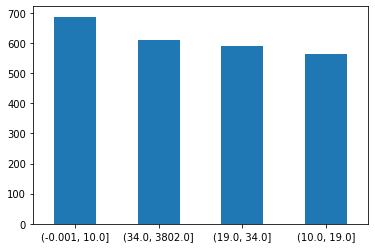

In [187]:
contagem.plot.bar(rot=0)